# Diffraction par le bord d'un écran

(voir Optique, Pérez)

$$ I(x) = \left( C(-\infty)-C(\alpha) \right)^2+\left( S(-\infty)-S(\alpha)\right)^2 $$

avec

$$ \alpha = \frac{x}{\sqrt{\lambda z}} $$

$$ \left\{ \begin{array}{l}
C(\alpha) = \int_0^{\alpha}\cos{(\pi u^2)}\mathrm{d}u \\
S(\alpha) = \int_0^{\alpha}\sin{(\pi u^2)}\mathrm{d}u
\end{array} \right. $$

In [1]:
import matplotlib
matplotlib.use('nbagg')

<IPython.core.display.Javascript object>


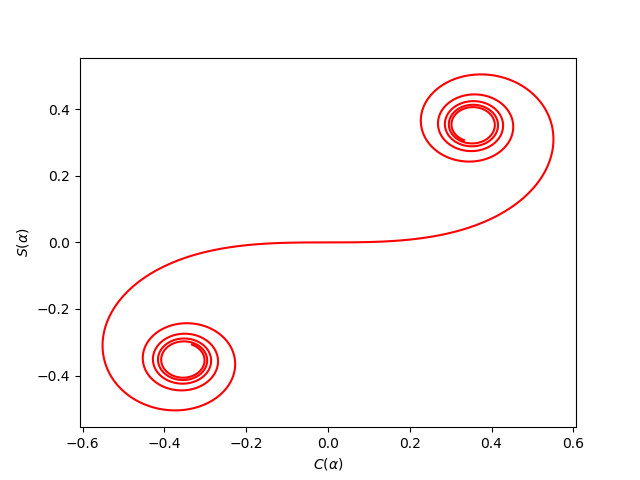

In [2]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

def C(alpha):
    if isinstance(alpha, np.ndarray):
        return np.array([C(a) for a in alpha])
    value, err = integrate.quad(lambda u: np.cos(np.pi*u**2), 0.0, alpha)
    return value

def S(alpha):
    if isinstance(alpha, np.ndarray):
        return np.array([S(a) for a in alpha])
    value, err = integrate.quad(lambda u: np.sin(np.pi*u**2), 0.0, alpha)
    return value

alpha = np.linspace(-np.pi, np.pi, 1000)

plt.figure()
plt.plot(C(alpha), S(alpha), 'r-')
plt.xlabel(r'$C(\alpha)$')
plt.ylabel(r'$S(\alpha)$')
plt.show()

<IPython.core.display.Javascript object>


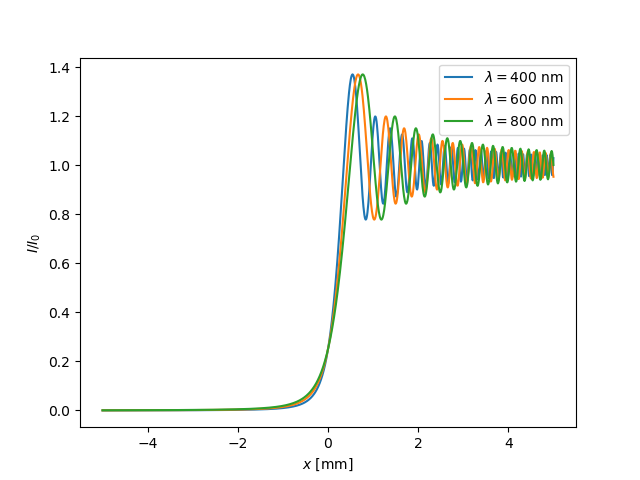

In [3]:
x = np.linspace(-5e-3, 5e-3, 1000)
z = 1.0
Cinf = -np.sqrt(2.0)/4.0
Sinf = -np.sqrt(2.0)/4.0
plt.figure()
for lambda_ in [400e-9, 600e-9, 800e-9]:
    alpha = x/np.sqrt(lambda_*z)
    I = (Cinf - C(alpha))**2+(Sinf - S(alpha))**2
    plt.plot(1e3*x, I, '-', label=r'$\lambda = {:d}$ nm'.format(int(1e9*lambda_)))
plt.legend()
plt.xlabel(r'$x$ [mm]')
plt.ylabel(r'$I/I_0$')
plt.show()